<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58026_LabNo1_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Review**




###**Importing of dataset**


In [ ]:
# !pip install tensorflow
# !pip install tensorflow-gpu
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
iris = pd.read_csv("/content/bezdekIris.data")

In [ ]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


###**Descriptive Analytics**





In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


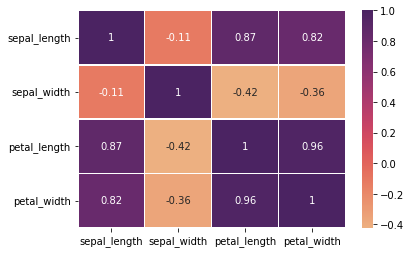

In [ ]:
plt.figure
sns.heatmap(iris.corr(),annot=True, cmap = "flare",linewidths=.4) 
plt.show()

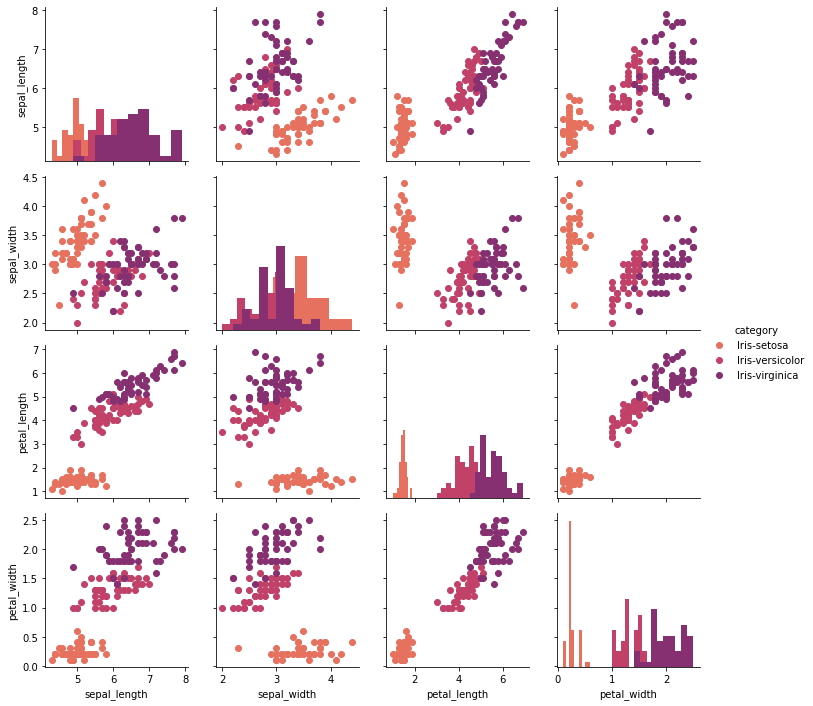

In [ ]:
GridPlot= sns.PairGrid(iris, hue="category", palette='flare')
GridPlot.map_diag(plt.hist)
GridPlot.map_offdiag(plt.scatter)
GridPlot.add_legend()

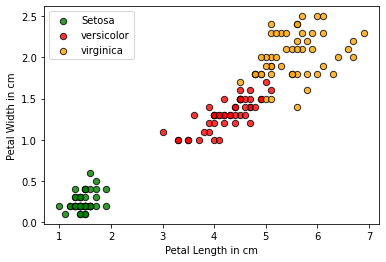

In [ ]:
#petal
petal = iris[iris.category=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='green', label='Setosa',edgecolor='black', s=40,alpha=0.8)
iris[iris.category=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='red', label='versicolor',ax=petal,edgecolor='black',s=40, alpha=0.8)
iris[iris.category=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='virginica', ax=petal,edgecolor='black',s=40, alpha=0.8)
petal.set_xlabel("Petal Length in cm")
petal.set_ylabel("Petal Width in cm")
petal=plt.gcf()
plt.show()

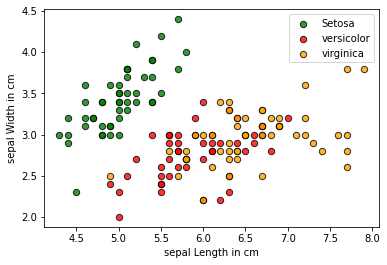

In [ ]:
#sepal comparison
sepal = iris[iris.category=='Iris-setosa'].plot.scatter(x='sepal_length',y='sepal_width',color='green', label='Setosa',edgecolor='black', s=40,alpha=0.8)
iris[iris.category=='Iris-versicolor'].plot.scatter(x='sepal_length',y='sepal_width',color='red', label='versicolor',ax=sepal,edgecolor='black',s=40, alpha=0.8)
iris[iris.category=='Iris-virginica'].plot.scatter(x='sepal_length',y='sepal_width',color='orange', label='virginica', ax=sepal,edgecolor='black',s=40, alpha=0.8)
sepal.set_xlabel("sepal Length in cm")
sepal.set_ylabel("sepal Width in cm")
sepal=plt.gcf()
plt.show()

##**Data Preprocessing**

In [116]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

# converting targets into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['category'] = le.fit_transform(iris['category'])
iris.head()

# splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

0 = setosa 1 = versicolor 2 = virginica

## **Model Training**

In [113]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [117]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model1.add(tf.keras.layers.Dense(8,activation='tanh'))
model1.add(tf.keras.layers.Dense(3,activation='softmax'))

model1.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 4)                 20        
                                                                 
 dense_69 (Dense)            (None, 8)                 40        
                                                                 
 dense_70 (Dense)            (None, 3)                 27        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [118]:
history1 = model1.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 2s 3ms/step - loss: 1.2920 - accuracy: 0.3445
Epoch 2/50
119/119 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.7143
Epoch 3/50
119/119 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.6891
Epoch 4/50
119/119 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.6134
Epoch 5/50
119/119 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.6723
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7311
Epoch 7/50
119/119 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.7899
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8235
Epoch 9/50
119/119 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.7899
Epoch 10/50
119/119 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9160

**NOTES**

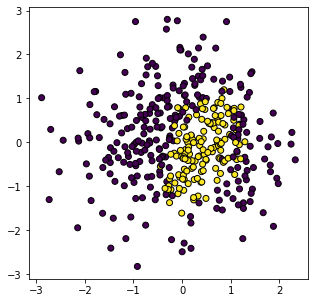

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]

def make_data():
    N = 800
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y

X, Y = make_data()

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.5)

plt.figure(figsize=(5,5))
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=Ytrain, edgecolors='k');

In [ ]:
### Dense Layer
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
lr=0.01
model2.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model2.summary()

In [ ]:
history2 = model2.fit(X_train,y_train,epochs=50, batch_size=1)


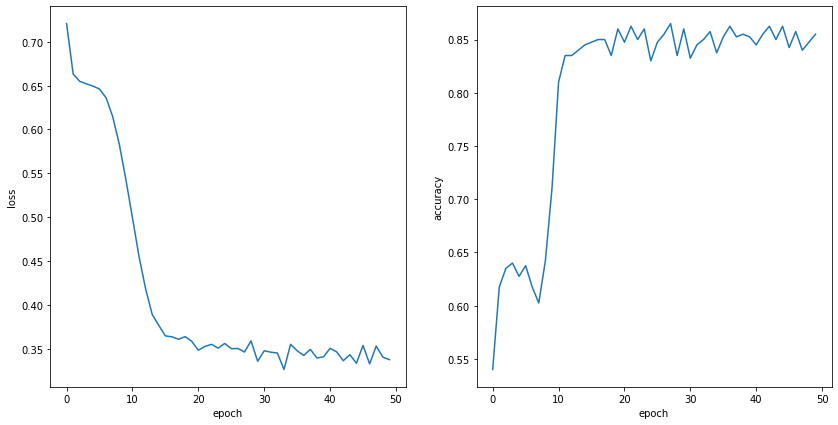

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history2.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

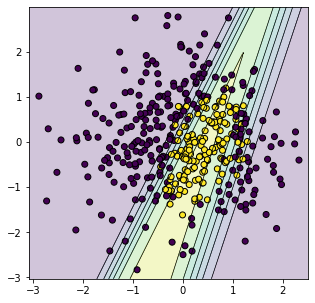

In [ ]:
plot_boundary(model2, X_train, y_train)